In [2]:
import sys
sys.path.append('/home/jovyan/work/')
sys.path.append('/home/jovyan/work/src')
sys.path.append('/home/jovyan/work/src/data')
sys.path.append('/home/jovyan/work/src/data_explore')
sys.path.append('/home/jovyan/work/src/features')
sys.path.append('/home/jovyan/work/src/models')
sys.path.append('/home/jovyan/work/src/analysis')


In [3]:
print(sys.path)

['/home/jovyan/work/notebooks', '/opt/conda/lib/python311.zip', '/opt/conda/lib/python3.11', '/opt/conda/lib/python3.11/lib-dynload', '', '/opt/conda/lib/python3.11/site-packages', '/home/jovyan/work/', '/home/jovyan/work/src', '/home/jovyan/work/src/data', '/home/jovyan/work/src/data_explore', '/home/jovyan/work/src/features', '/home/jovyan/work/src/models', '/home/jovyan/work/src/analysis']


In [4]:
from src import data,data_explore,features
from data import create_input_data
from data_explore import explore_util
from features import build_features
from models import train_model,predict_model
from analysis import analyze_pred

In [5]:
df10 = create_input_data.read_data(csv_file_name="../data/processed/correct_anon_past_10_completed_qm.csv", parse_dates_col=[4,5,6])
df25 = create_input_data.read_data(csv_file_name="../data/processed/correct_anon_past_25_completed_qm.csv", parse_dates_col=[4,5,6])
df35 = create_input_data.read_data(csv_file_name="../data/processed/correct_anon_past_35_completed_qm.csv", parse_dates_col=[4,5,6])
df50 = create_input_data.read_data(csv_file_name="../data/processed/correct_anon_past_50_completed_qm.csv", parse_dates_col=[4,5,6])
#df75 = create_input_data.read_data(csv_file_name="../data/processed/anon_past_75_completed_qm.csv", parse_dates_col=[4,5,6])
#df100 = create_input_data.read_data(csv_file_name="../data/processed/anon_past_100_completed_qm.csv", parse_dates_col=[4,5,6])

In [6]:
df10 = build_features.remove_default_cols(df10)
df25 = build_features.remove_default_cols(df25)
df35 = build_features.remove_default_cols(df35)
df50 = build_features.remove_default_cols(df50)
#df75 = build_features.remove_default_cols(df75)
#df100 = build_features.remove_default_cols(df100)


In [7]:
df10 = build_features.slice_df(df10,1000,323216)
df25 = build_features.slice_df(df25,1000,323216)
df35 = build_features.slice_df(df35,1000,323216)
df50 = build_features.slice_df(df50,1000,323216)
#df75 = build_features.slice_df(df75,1000,323216)
#df100 = build_features.slice_df(df100,1000,323216)

In [8]:
### Remove the queue_minutes column from the training set
X_historydata10=build_features.remove_specific_col(df10,'queue_minutes')
X_historydata25=build_features.remove_specific_col(df25,'queue_minutes')
X_historydata35=build_features.remove_specific_col(df35,'queue_minutes')
X_historydata50=build_features.remove_specific_col(df50,'queue_minutes')
# X_historydata75=build_features.remove_specific_col(df75,'queue_minutes')
# X_historydata100=build_features.remove_specific_col(df100,'queue_minutes')
Y_waittimedata=df25['queue_minutes']

In [9]:
X_historydata25
#Y_waittimedata

,reqcpus,nnodes,max_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes,run_minutes,qm1,qm2,...,qm16,qm17,qm18,qm19,qm20,qm21,qm22,qm23,qm24,qm25
1000,1,1,120,268796,275,20395,7967258,10,0,0,...,0,0,0,0,1,1,1,34,0,0
1001,1,1,120,268916,276,20395,7967258,9,0,0,...,0,0,0,0,1,1,1,34,0,0
1002,1,1,120,269036,277,20395,7967258,9,0,0,...,0,0,0,0,1,1,1,34,0,0
1003,1,1,120,269156,278,20395,7967258,8,0,0,...,0,0,0,0,1,1,1,34,0,0
1004,1,1,120,269276,279,20395,7967258,8,0,0,...,0,0,0,0,1,1,1,34,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323211,48,1,120,898116,394,22918,9692906,23,0,0,...,0,0,0,0,1,1,1,1,0,0
323212,48,1,120,898236,395,22918,9692906,54,0,0,...,0,0,0,0,1,1,1,1,0,0
323213,48,1,120,898356,396,22918,9692906,38,0,0,...,0,0,0,0,1,1,1,1,0,0
323214,100,2,180,898356,396,22918,9692906,129,0,0,...,0,0,0,0,0,1,1,1,1,0


In [10]:
##10
X_historydata_train10_rm, X_historydata_test10_rm, Y_waittimedata10_train, Y_waittimedata10_test = build_features.split_training_test_data(X_historydata10, Y_waittimedata)
##25
X_historydata_train25_rm, X_historydata_test25_rm, Y_waittimedata25_train, Y_waittimedata25_test = build_features.split_training_test_data(X_historydata25, Y_waittimedata)
##35
X_historydata_train35_rm, X_historydata_test35_rm, Y_waittimedata35_train, Y_waittimedata35_test = build_features.split_training_test_data(X_historydata35, Y_waittimedata)
##50
X_historydata_train50_rm, X_historydata_test50_rm, Y_waittimedata50_train, Y_waittimedata50_test = build_features.split_training_test_data(X_historydata50, Y_waittimedata)
# ##75
# X_historydata_train75_rm, X_historydata_test75_rm, Y_waittimedata75_train, Y_waittimedata75_test = build_features.split_training_test_data(X_historydata75, Y_waittimedata)
# ##100
# X_historydata_train100_rm, X_historydata_test100_rm, Y_waittimedata100_train, Y_waittimedata100_test = build_features.split_training_test_data(X_historydata100, Y_waittimedata)

shapes: X train: (241662, 18) Y train: (241662,)
shapes: X test: (80554, 18)Y test: (80554,)
shapes: X train: (241662, 33) Y train: (241662,)
shapes: X test: (80554, 33)Y test: (80554,)
shapes: X train: (241662, 43) Y train: (241662,)
shapes: X test: (80554, 43)Y test: (80554,)
shapes: X train: (241662, 58) Y train: (241662,)
shapes: X test: (80554, 58)Y test: (80554,)


In [11]:
X_historydata_test10 = build_features.remove_specific_col(X_historydata_test10_rm,'run_minutes')
X_historydata_train10 = build_features.remove_specific_col(X_historydata_train10_rm,'run_minutes')
X_historydata_test25 = build_features.remove_specific_col(X_historydata_test25_rm,'run_minutes')
X_historydata_train25 = build_features.remove_specific_col(X_historydata_train25_rm,'run_minutes')
X_historydata_test35 = build_features.remove_specific_col(X_historydata_test35_rm,'run_minutes')
X_historydata_train35 = build_features.remove_specific_col(X_historydata_train35_rm,'run_minutes')
X_historydata_test50 = build_features.remove_specific_col(X_historydata_test50_rm,'run_minutes')
X_historydata_train50 = build_features.remove_specific_col(X_historydata_train50_rm,'run_minutes')

# X_historydata_test75 = build_features.remove_specific_col(X_historydata_test75_rm,'run_minutes')
# X_historydata_train75 = build_features.remove_specific_col(X_historydata_train75_rm,'run_minutes')

# X_historydata_test100 = build_features.remove_specific_col(X_historydata_test100_rm,'run_minutes')
# X_historydata_train100 = build_features.remove_specific_col(X_historydata_train100_rm,'run_minutes')

In [12]:
X_historydata_train25

,reqcpus,nnodes,max_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes,qm1,qm2,qm3,...,qm16,qm17,qm18,qm19,qm20,qm21,qm22,qm23,qm24,qm25
217891,48,1,120,152340,84,22226,9143715,0,1,0,...,0,0,0,0,0,0,0,0,0,0
61850,120,5,120,617365,358,20807,8085582,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57136,2,1,60,254110,174,20804,8084622,1,0,0,...,172,178,180,170,0,0,111,84,254,88
121508,240,20,6,3642,14,21179,8272622,0,0,0,...,0,0,0,0,0,0,0,0,0,0
182686,16,1,119,18060,8,21894,8932031,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120879,64,1,2880,45055,87,21169,8268322,1,39,35,...,0,2,0,0,0,52,54,74,73,73
260178,16,1,119,0,0,22480,9318710,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132932,96,2,15,39120,27,21315,8345656,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147867,44,1,2880,289270,160,21442,8411807,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X_historydata_norm10, scaler10 = build_features.standardization(X_historydata_train10)
X_historydata_norm25, scaler25 = build_features.standardization(X_historydata_train25)
X_historydata_norm35, scaler35 = build_features.standardization(X_historydata_train35)
X_historydata_norm50, scaler50 = build_features.standardization(X_historydata_train50)
# X_historydata_norm75, scaler75 = build_features.standardization(X_historydata_train75)
# X_historydata_norm100, scaler100 = build_features.standardization(X_historydata_train100)

MinMaxScaler()
data max = [3.276800e+04 2.560000e+02 9.000000e+03 1.414325e+06 7.010000e+02
 2.291800e+04 9.692906e+06 6.670000e+02 3.154000e+03 3.154000e+03
 3.155000e+03 3.156000e+03 3.158000e+03 3.164000e+03 3.191000e+03
 3.192000e+03 3.193000e+03]
data min = [1.000000e+00 1.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00
 2.039500e+04 7.967258e+06 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00]
data range = [3.276700e+04 2.550000e+02 8.999000e+03 1.414325e+06 7.010000e+02
 2.523000e+03 1.725648e+06 6.670000e+02 3.154000e+03 3.154000e+03
 3.155000e+03 3.156000e+03 3.158000e+03 3.164000e+03 3.191000e+03
 3.192000e+03 3.193000e+03]
per feature scale =[3.05185095e-05 3.92156863e-03 1.11123458e-04 7.07051067e-07
 1.42653352e-03 3.96353547e-04 5.79492457e-07 1.49925037e-03
 3.17057705e-04 3.17057705e-04 3.16957211e-04 3.16856781e-04
 3.16656111e-04 3.16055626e-04 3.13381385e-04 3.13283208e-04
 3.131850

In [14]:
from importlib import reload
from tensorflow.keras.models import load_model

h5_files=["../models/correct_anon_10past_corrected_qm_model.h5",
          "../models/anon_corrected_completed_25past_corrected_qm_model.h5",
          "../models/correct_anon_35past_corrected_qm_model.h5",
          "../models/correct_anon_50past_corrected_qm_model.h5"
          #"../models/anon_75past_corrected_qm_model.h5",
          #"../models/anon_100past_corrected_qm_model.h5"
         ]
model = {}
model['10'] = load_model(h5_files[0])
model['25'] = load_model(h5_files[1])
model['35'] = load_model(h5_files[2])
model['50'] = load_model(h5_files[3])
# model['75'] = load_model(h5_files[4])
# model['100'] = load_model(h5_files[5])
    

In [15]:
predict_model.evaluate(model['10'],scaler10,X_historydata_test10, Y_waittimedata10_test)
predict_model.evaluate(model['25'],scaler25,X_historydata_test25, Y_waittimedata25_test)
predict_model.evaluate(model['35'],scaler35,X_historydata_test35, Y_waittimedata35_test)
predict_model.evaluate(model['50'],scaler50,X_historydata_test50, Y_waittimedata50_test)
# predict_model.evaluate(model['75'],scaler75,X_historydata_test75, Y_waittimedata75_test)
# predict_model.evaluate(model['100'],scaler100,X_historydata_test100, Y_waittimedata100_test)


2518/2518 [==============================] - 1s 458us/step - loss: 89517.3438 - mae: 77.7687
loss — -> 89517.34375
mae — -> 77.76868438720703
 206/2518 [=>............................] - ETA: 1s - loss: 132496.2500 - mae: 76.5610

2023-10-09 19:11:15.011675: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 10310912 exceeds 10% of free system memory.


2518/2518 [==============================] - 1s 456us/step - loss: 86572.4375 - mae: 69.7644
loss — -> 86572.4375
mae — -> 69.76439666748047
 210/2518 [=>............................] - ETA: 1s - loss: 95495.2188 - mae: 75.4701

2023-10-09 19:11:16.276845: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 13533072 exceeds 10% of free system memory.


2518/2518 [==============================] - 1s 454us/step - loss: 67667.0781 - mae: 70.4864
loss — -> 67667.078125
mae — -> 70.48643493652344
2518/2518 [==============================] - 1s 442us/step - loss: 75033.6562 - mae: 67.6863
loss — -> 75033.65625
mae — -> 67.68633270263672


In [16]:
y_pred10 = predict_model.predict_and_compare(model['10'],scaler10, X_historydata_test10, Y_waittimedata10_test)
y_pred25 = predict_model.predict_and_compare(model['25'],scaler25, X_historydata_test25, Y_waittimedata25_test)
y_pred35 = predict_model.predict_and_compare(model['35'],scaler35, X_historydata_test35, Y_waittimedata35_test)
y_pred50 = predict_model.predict_and_compare(model['50'],scaler50, X_historydata_test50, Y_waittimedata50_test)
# y_pred75 = predict_model.predict_and_compare(model['75'],scaler75, X_historydata_test75, Y_waittimedata75_test)
# y_pred100 = predict_model.predict_and_compare(model['100'],scaler100, X_historydata_test100, Y_waittimedata100_test)

2518/2518 [==============================] - 1s 403us/step
y_pred shape : (80554, 1)
--- inspecting prediction values --- 
number of negative numbers  :6822
number of zeros in the data : 0
number of positive numbers  :73732

 --- inspecting original values ---
number of negative numbers  :0
number of zeros in the data : 49440
number of positive numbers  :31114

 ---inspecting prediction values after clipping negative values to zeros --- 
number of negative numbers  :0
number of zeros in the data : 6822
number of positive numbers  :73732

 359/2518 [===>..........................] - ETA: 0s

2023-10-09 19:11:20.145590: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 10310912 exceeds 10% of free system memory.


2518/2518 [==============================] - 1s 405us/step
y_pred shape : (80554, 1)
--- inspecting prediction values --- 
number of negative numbers  :15719
number of zeros in the data : 0
number of positive numbers  :64835

 --- inspecting original values ---
number of negative numbers  :0
number of zeros in the data : 49440
number of positive numbers  :31114

 ---inspecting prediction values after clipping negative values to zeros --- 
number of negative numbers  :0
number of zeros in the data : 15719
number of positive numbers  :64835

 361/2518 [===>..........................] - ETA: 0s

2023-10-09 19:11:21.485475: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 13533072 exceeds 10% of free system memory.


2518/2518 [==============================] - 1s 407us/step
y_pred shape : (80554, 1)
--- inspecting prediction values --- 
number of negative numbers  :34279
number of zeros in the data : 0
number of positive numbers  :46275

 --- inspecting original values ---
number of negative numbers  :0
number of zeros in the data : 49440
number of positive numbers  :31114

 ---inspecting prediction values after clipping negative values to zeros --- 
number of negative numbers  :0
number of zeros in the data : 34279
number of positive numbers  :46275

 365/2518 [===>..........................] - ETA: 0s

2023-10-09 19:11:22.841636: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18366312 exceeds 10% of free system memory.


2518/2518 [==============================] - 1s 403us/step
y_pred shape : (80554, 1)
--- inspecting prediction values --- 
number of negative numbers  :19895
number of zeros in the data : 0
number of positive numbers  :60659

 --- inspecting original values ---
number of negative numbers  :0
number of zeros in the data : 49440
number of positive numbers  :31114

 ---inspecting prediction values after clipping negative values to zeros --- 
number of negative numbers  :0
number of zeros in the data : 19895
number of positive numbers  :60659



In [17]:
predict_model.inspect_test_data(X_historydata_test10,Y_waittimedata10_test,y_pred10,207,210, "set 1: 207: 210")
predict_model.inspect_test_data(X_historydata_test25,Y_waittimedata25_test,y_pred25,207,210, "set 1: 207: 210")
predict_model.inspect_test_data(X_historydata_test35,Y_waittimedata35_test,y_pred35,207,210, "set 1: 207: 210")

------------------set 1: 207: 210-----------------------
qm test:[476   0 552]
qm pred:[692.3259    46.38941  109.766365]
X test:        reqcpus  nnodes  max_minutes  backlog_minutes  backlog_num_jobs  \
12287       128       8          960           279632               345   
221064        6       1           60           510355               301   
162775      192       3          720            57405               125   

        running_num_jobs  running_minutes  qm1  qm2  qm3  qm4  qm5  qm6  qm7  \
12287              20440          7989204    1    0    0    0    0    0    0   
221064             22259          9161393    0    0    7    5    3    4    4   
162775             21691          8754769    1    0    0    0    1    1    3   

        qm8  qm9  qm10  
12287     1    0     0  
221064    8    2     1  
162775    0    0     0  
------------------------------------------------------
------------------set 1: 207: 210-----------------------
qm test:[476   0 552]
qm pred:[746.26

In [18]:
print(X_historydata_test25_rm)
run_mins = X_historydata_test25_rm["run_minutes"]
run_mins = run_mins.to_numpy()
print("run_minutes" + str(run_mins))
nnodes = X_historydata_test25["nnodes"]
nnodes = nnodes.to_numpy()
print(" nnodes : " + str(nnodes))


        reqcpus  nnodes  max_minutes  backlog_minutes  backlog_num_jobs  \
67571       256       8          120           287137               134   
50519        96       2           15            97795                71   
204988       64       1         2880             9360                 4   
213449       32       1          900            95220                75   
199380       32       1          720             1440                 2   
...         ...     ...          ...              ...               ...   
20257       128       2         1440           300982               226   
231778       48       1          120            60330                45   
273373       64       2          240                0                 0   
141023       96       2           15                0                 0   
172448      144       3            5            37980                15   

        running_num_jobs  running_minutes  run_minutes  qm1  qm2  ...  qm16  \
67571              2

In [19]:
# reload(analyze_pred)
# def analysis(provision_time):
#     print("----------- Past 10 completed queue minutes ----------------")
#     analyze_pred.analysis_pred_vs_orig(lo,offset, Y_waittimedata10_test, y_pred10.ravel(), nnodes,run_mins,
#                                    provision_time=provision_time, tolerance_factor=tolerance_factor, print_flag=0)
#     print("------------ Past 25 completed queue minutes ----------------")
#     analyze_pred.analysis_pred_vs_orig(lo,offset, Y_waittimedata25_test, y_pred25.ravel(), nnodes,run_mins,
#                                    provision_time=provision_time, tolerance_factor=tolerance_factor, print_flag=0)
#     print("------------ Past 35 completed queue minutes ----------------")
#     analyze_pred.analysis_pred_vs_orig(lo,offset, Y_waittimedata35_test, y_pred35.ravel(), nnodes,run_mins,
#                                    provision_time=provision_time, tolerance_factor=tolerance_factor, print_flag=0)
#     print("------------ Past 50 completed queue minutes ----------------")
#     analyze_pred.analysis_pred_vs_orig(lo,offset, Y_waittimedata50_test, y_pred50.ravel(), nnodes,run_mins,
#                                    provision_time=provision_time, tolerance_factor=tolerance_factor, print_flag=0)
#    # print("----------- Past 75 completed queue minutes ----------------")
#    # analyze_pred.analysis_pred_vs_orig(lo,offset, Y_waittimedata75_test, y_pred75.ravel(), nnodes,run_mins,
#    #                                provision_time=provision_time, tolerance_factor=tolerance_factor, print_flag=0)

In [20]:
reload(analyze_pred)
from sklearn.metrics import r2_score,mean_absolute_error


def analysis_pred(provision_time):
    ptime = []
    num_scheduled=[] 
    num_missed=[]
    not_missed=[]
    wrongly_scheduled=[]
    total_num=[]
    past_K=[]
    r2_scores=[]
    maes = []
    #print("----------- Past 10 completed queue minutes ----------------")
    provision_time, n_scheduled, n_missed, no_missed, wrong_scheduled, t_num = analyze_pred.analysis_pred(lo,offset, Y_waittimedata10_test, y_pred10.ravel(), nnodes,run_mins,
                                                                                                          provision_time=provision_time, tolerance_factor=tolerance_factor, print_flag=0)
    past_K.append(10)
    ptime.append(provision_time)
    num_scheduled.append(n_scheduled)
    num_missed.append(n_missed)
    not_missed.append(no_missed)
    wrongly_scheduled.append(wrong_scheduled)
    total_num.append(t_num)
    r2s = r2_score(Y_waittimedata10_test.to_numpy(),y_pred10)
    r2_scores.append(r2s)
    maes.append(mean_absolute_error(Y_waittimedata10_test.to_numpy(),y_pred10))
    #print("------------ Past 25 completed queue minutes ----------------")
    provision_time, n_scheduled, n_missed, no_missed, wrong_scheduled, t_num = analyze_pred.analysis_pred(lo,offset, Y_waittimedata25_test, y_pred25.ravel(), nnodes,run_mins,
                                                                                                           provision_time=provision_time, tolerance_factor=tolerance_factor, print_flag=0)
    past_K.append(25)
    ptime.append(provision_time)
    num_scheduled.append(n_scheduled)
    num_missed.append(n_missed)
    not_missed.append(no_missed)
    wrongly_scheduled.append(wrong_scheduled)
    total_num.append(t_num)
    r2s=r2_score(Y_waittimedata25_test.to_numpy(),y_pred25)
    r2_scores.append(r2s)     
    maes.append(mean_absolute_error(Y_waittimedata25_test.to_numpy(),y_pred25))
    #print("------------ Past 35 completed queue minutes ----------------")
    provision_time, n_scheduled, n_missed, no_missed, wrong_scheduled, t_num = analyze_pred.analysis_pred(lo,offset, Y_waittimedata35_test, y_pred35.ravel(), nnodes,run_mins,    
                                                                                                           provision_time=provision_time, tolerance_factor=tolerance_factor, print_flag=0)
    past_K.append(35)
    ptime.append(provision_time)
    num_scheduled.append(n_scheduled)
    num_missed.append(n_missed)
    not_missed.append(no_missed)
    wrongly_scheduled.append(wrong_scheduled)
    total_num.append(t_num)
    r2s=r2_score(Y_waittimedata35_test.to_numpy(),y_pred35)
    r2_scores.append(r2s)
    maes.append(mean_absolute_error(Y_waittimedata35_test.to_numpy(),y_pred35))
    #print("------------ Past 50 completed queue minutes ----------------")
    provision_time, n_scheduled, n_missed, no_missed, wrong_scheduled, t_num = analyze_pred.analysis_pred(lo,offset, Y_waittimedata50_test, y_pred50.ravel(), nnodes,run_mins,
                                provision_time=provision_time, tolerance_factor=tolerance_factor, print_flag=0)
    past_K.append(50)
    ptime.append(provision_time)
    num_scheduled.append(n_scheduled)
    num_missed.append(n_missed)
    not_missed.append(no_missed)
    wrongly_scheduled.append(wrong_scheduled)
    total_num.append(t_num)
    r2s=r2_score(Y_waittimedata50_test.to_numpy(),y_pred50)
    r2_scores.append(r2s)
    maes.append(mean_absolute_error(Y_waittimedata50_test.to_numpy(),y_pred50))
    #print("----------- Past 75 completed queue minutes ----------------")
    #provision_time, n_scheduled, n_missed, no_missed, wrong_scheduled, t_num = analyze_pred.analysis_pred(lo,offset, Y_waittimedata75_test, y_pred75.ravel(), nnodes,run_mins,
    #                              provision_time=provision_time, tolerance_factor=tolerance_factor, print_flag=0)
    # past_K.append("75")
    # ptime.append(provision_time)
    # num_scheduled.append(n_scheduled)
    # num_missed.append(n_missed)
    # not_missed.append(no_missed)
    # wrongly_scheduled.append(wrong_scheduled)
    # total_num.append(t_num)
    # r2s=r2_score(Y_waittimedata75_test.to_numpy(),y_pred75)
    # r2_scores.append(r2s)
    # maes.append(mean_absolute_error(Y_waittimedata75_test.to_numpy(),y_pred75))
    # #print("----------- Past 100 completed queue minutes ----------------")
    # provision_time, n_scheduled, n_missed, no_missed, wrong_scheduled, t_num = analyze_pred.analysis_pred(lo,offset, Y_waittimedata100_test, y_pred100.ravel(), nnodes,run_mins,
    #                                provision_time=provision_time, tolerance_factor=tolerance_factor, print_flag=0)
    # past_K.append("100")
    # ptime.append(provision_time)
    # num_scheduled.append(n_scheduled)
    # num_missed.append(n_missed)
    # not_missed.append(no_missed)
    # wrongly_scheduled.append(wrong_scheduled)
    # total_num.append(t_num)
    # r2s=r2_score(Y_waittimedata100_test.to_numpy(),y_pred100)
    # r2_scores.append(r2s)
    # maes.append(mean_absolute_error(Y_waittimedata100_test.to_numpy(),y_pred100))
    return past_K,ptime, num_scheduled, num_missed, not_missed, wrongly_scheduled, total_num,r2_scores,maes

In [21]:
import pandas as pd
reload(analyze_pred)
lo=0
offset=80554
provision_times=[20, 45, 60, 90]
tolerance_factor=3

rdf = pd.DataFrame()
for provision_time in provision_times:
    ptime = []
    num_scheduled=[] 
    num_missed=[]
    not_missed=[]
    wrongly_scheduled=[]
    total_num=[]
    past_K=[]
    #print(" ========= Provision time = " + str(provision_time))
    pastk, ptime, num_scheduled, num_missed, not_missed, wrongly_scheduled, total_num, r2_scores, maes = analysis_pred(provision_time)
    #rdf = analyze_pred.add_to_df(pastk, ptime, num_scheduled, num_missed, not_missed, wrongly_scheduled, total_num,r2_scores,maes)
    #print(rdf.to_string())
    #if provision_time == 20:
    #    rdf = analyze_pred.append_to_df(rdf,pastk,ptime, num_scheduled, num_missed, not_missed, wrongly_scheduled, total_num,r2_scores,maes)
    #else:
    for i in range(0, len(pastk)):
        #print("num_scheduled: " + str(num_scheduled[i]))
        rdf =  analyze_pred.append_to_df(rdf,pastk[i],ptime[i], num_scheduled[i], num_missed[i], not_missed[i], wrongly_scheduled[i], total_num[i],r2_scores[i],maes[i])
     

In [22]:
rdf

,past_k,provision_time,num_scheduled,num_missed,not_missed,wrongly_scheduled,total_num,r2_score,mae
0,10,20,15946,1502,14444,12484,80554,0.616640,76.475960
1,25,20,15946,2176,13770,9009,80554,0.629560,67.750201
2,35,20,15946,2990,12956,6796,80554,0.711511,62.222957
3,50,20,15946,2310,13636,8488,80554,0.679945,64.241371
4,10,45,11288,1913,9375,5498,80554,0.616640,76.475960
5,25,45,11288,2175,9113,4505,80554,0.629560,67.750201
6,35,45,11288,2885,8403,3763,80554,0.711511,62.222957
7,50,45,11288,2570,8718,3827,80554,0.679945,64.241371
8,10,60,9585,1870,7715,4382,80554,0.616640,76.475960
9,25,60,9585,2124,7461,3760,80554,0.629560,67.750201


In [23]:
# write to file
from pathlib import Path  
filepath = Path('../reports/sym_fnn_model_layer1_30_layer2_100_100results.csv')  
#filepath.parent.mkdir(parents=True, exist_ok=True)  
rdf.to_csv(filepath,index=False)

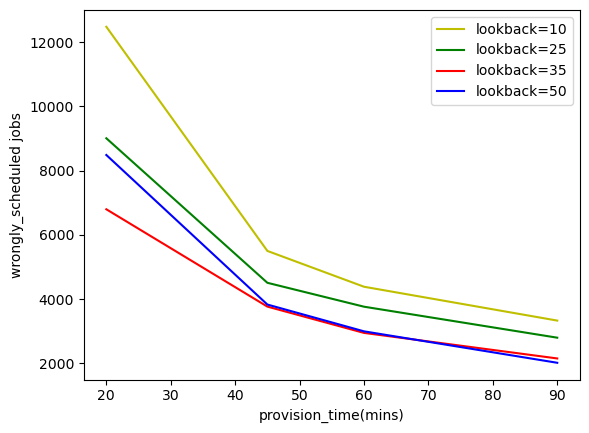

In [25]:
import matplotlib.pyplot as plt
pastk=[10,25,35,50]
color=['y','g','r','b']
i=0
lines = []

for k in pastk:
    
    line, = plt.plot(rdf.loc[rdf['past_k']==k,'provision_time'],rdf.loc[rdf['past_k']==k,'wrongly_scheduled'],color[i])
    line.set_label('lookback='+str(k))
    plt.xlabel('provision_time(mins)')
    plt.ylabel('wrongly_scheduled jobs')
    plt.legend()
    i=i+1


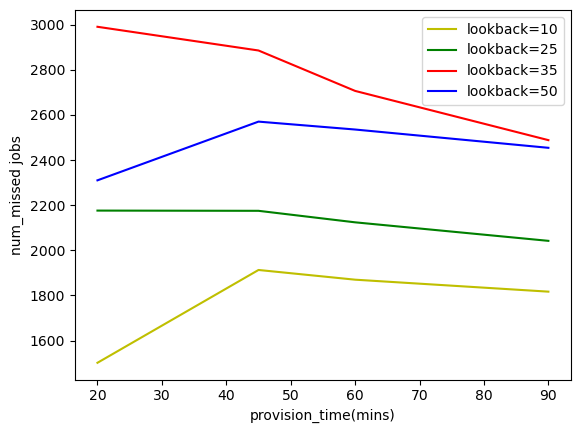

In [26]:
pastk=[10,25,35,50]
color=['y','g','r','b']
i=0
lines = []

for k in pastk:
    
    line, = plt.plot(rdf.loc[rdf['past_k']==k,'provision_time'],rdf.loc[rdf['past_k']==k,'num_missed'],color[i])
    line.set_label('lookback='+str(k))
    plt.xlabel('provision_time(mins)')
    plt.ylabel('num_missed jobs')
    plt.legend()
    i=i+1


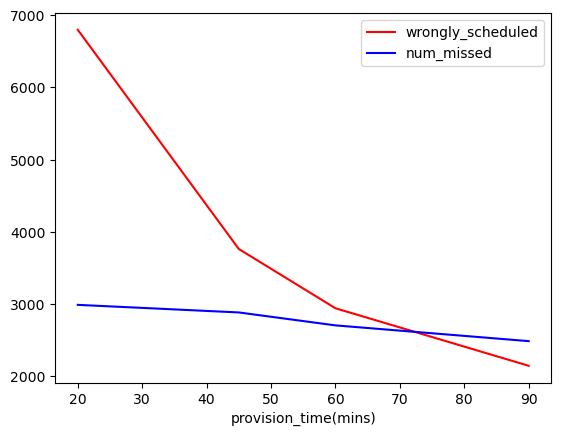

In [27]:
pastk=35
color=['y','g','r','b']
#i=0
line1, = plt.plot(rdf.loc[rdf['past_k']==pastk,'provision_time'],rdf.loc[rdf['past_k']==pastk,'wrongly_scheduled'],'r')   
line2, = plt.plot(rdf.loc[rdf['past_k']==pastk,'provision_time'],rdf.loc[rdf['past_k']==pastk,'num_missed'],'b')
#line3, = plt.plot(rdf.loc[rdf['past_k']==pastk,'provision_time'],rdf.loc[rdf['past_k']==pastk,'not_missed'],'g')
line1.set_label('wrongly_scheduled')
line2.set_label('num_missed')
#line3.set_label('not_missed')
plt.xlabel('provision_time(mins)')
#plt.ylabel('num_missed jobs')
plt.legend()
#i=i+1

percentage_wrongly_scheduled: 
2     8.436577
6     4.671401
10    3.653450
14    2.665293
dtype: float64
percentage_num_missed: 
2     18.750784
6     25.558115
10    28.231612
14    34.574764
dtype: float64
percentage_num_scheduled: 
2     19.795417
6     14.012960
10    11.898850
14     8.933138
dtype: float64
percentage_not_missed: 
2     81.249216
6     74.441885
10    71.768388
14    65.425236
dtype: float64


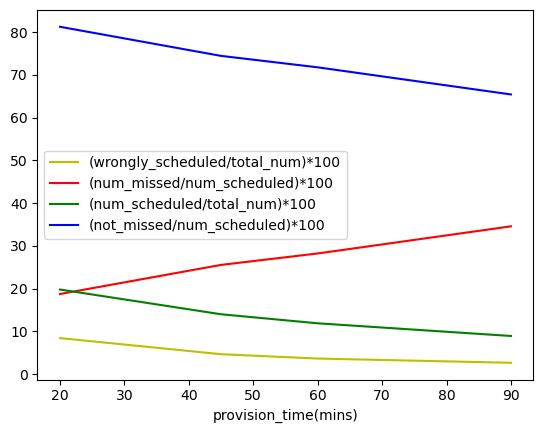

In [28]:
pastk=35
color=['y','g','r','b']
#print("provision_time for look back 35 " + str([rdf['past_k']==pastk,'provision_time']))
percentage_wrongly_scheduled = (rdf.loc[rdf['past_k']==pastk,'wrongly_scheduled']/rdf.loc[rdf['past_k']==pastk,'total_num'])*100.00
print("percentage_wrongly_scheduled: \n"+ str(percentage_wrongly_scheduled))
line1, = plt.plot(rdf.loc[rdf['past_k']==pastk,'provision_time'],percentage_wrongly_scheduled,'y')
line1.set_label('(wrongly_scheduled/total_num)*100')
plt.xlabel('provision_time(mins)')

percentage_num_missed = (rdf.loc[rdf['past_k']==pastk,'num_missed']/rdf.loc[rdf['past_k']==pastk,'num_scheduled'])*100.00
print("percentage_num_missed: \n" + str(percentage_num_missed))
line2, = plt.plot(rdf.loc[rdf['past_k']==pastk,'provision_time'],percentage_num_missed,'r')
line2.set_label('(num_missed/num_scheduled)*100')
#plt.xlabel('provision_time(mins)')

percentage_num_scheduled = (rdf.loc[rdf['past_k']==pastk,'num_scheduled']/rdf.loc[rdf['past_k']==pastk,'total_num'])*100.00
print("percentage_num_scheduled: \n" + str(percentage_num_scheduled))
line3, = plt.plot(rdf.loc[rdf['past_k']==pastk,'provision_time'],percentage_num_scheduled,'g')
line3.set_label('(num_scheduled/total_num)*100')
#plt.xlabel('provision_time(mins)')
#plt.ylabel('wrongly_scheduled jobs')

percentage_not_missed = (rdf.loc[rdf['past_k']==pastk,'not_missed']/rdf.loc[rdf['past_k']==pastk,'num_scheduled'])*100.00
print("percentage_not_missed: \n" + str(percentage_not_missed))
line4, = plt.plot(rdf.loc[rdf['past_k']==pastk,'provision_time'],percentage_not_missed,'b')
line4.set_label('(not_missed/num_scheduled)*100')
plt.legend()



In [31]:
from sklearn.metrics import r2_score
x=r2_score(Y_waittimedata35_test.to_numpy(),y_pred35)
print(x)

0.7115105625161986
